In [1]:
!pip install shap
!pip install gurobipy
import ipywidgets as widgets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import random
import os
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
import shap
shap.initjs()
import gurobipy as gp
from gurobipy import GRB

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 39.4 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount= True)
%cd gdrive/MyDrive/napoli

Mounted at /content/gdrive
/content/gdrive/MyDrive/napoli


In [ ]:
from SCOPE_EDBT_functions import *

DATASET SELECTION

In [ ]:
dataset1 = 'campione'
dataset2 = 'titanic'

target = {dataset1: 'Recidivist', dataset2: 'Survived'}
columns_of_interest = {dataset2: ['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch', 'Survived' ], dataset1: ['Age at entry', 'Length of imprisonment', 'Numbers of entries', 'Citizenship', 'Treatment', 'Recidivist']}
columns_for_analysis = {dataset1: ['Age at entry', 'Length of imprisonment', 'Numbers of entries', 'Citizenship', 'Treatment'], dataset2: ['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch'] }

Dataset = widgets.Dropdown(
    options=[dataset1, dataset2],
    value=dataset1,
    description='Dataset:',
    disabled=False,
)
Dataset

Dropdown(description='Dataset:', options=('campione', 'titanic'), value='campione')

DATASET COLUMNS SELECTION

In [ ]:
df=pd.read_excel('%s.xlsx' % Dataset.value, sheet_name='Sheet2')
np.random.seed(1)
df = df.sample(frac=1)
columns = df.columns.tolist()

Column = widgets.Dropdown(
    options=columns,
    description='Column:',
    disabled=False,
)

Column

Dropdown(description='Column:', options=('Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'), value=…

In [ ]:
X_tot=df[columns_of_interest[Dataset.value]]
X=df[columns_for_analysis[Dataset.value]]
y=df[target[Dataset.value]]
train_dataset, test_dataset, _, _ = train_test_split(X_tot, y, test_size=0.3, random_state=1, stratify=y)
lower,upper = None, None

FEATURES VISUALIZATION

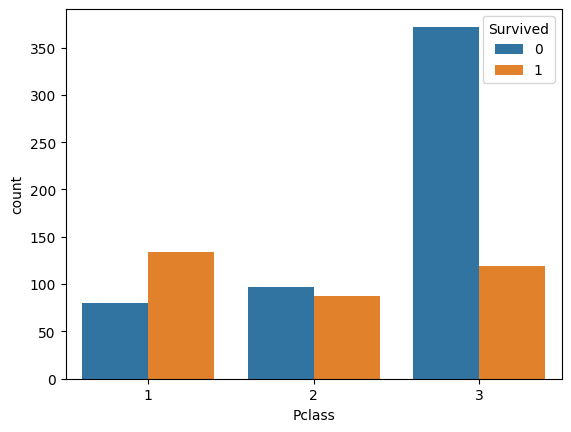

In [ ]:
graph(target, Column, df, Dataset)

MODEL SELECTION

In [ ]:
Model = widgets.Dropdown(
    options=["Random forest", "Logistic regression", "Neural networks"],
    description='Model:',
    disabled=False,
)

Model

Dropdown(description='Model:', options=('Random forest', 'Logistic regression', 'Neural networks'), value='Ran…

Accuracy global: 0.8239700374531835
REPORT:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       165
           1       0.80      0.73      0.76       102

    accuracy                           0.82       267
   macro avg       0.82      0.81      0.81       267
weighted avg       0.82      0.82      0.82       267



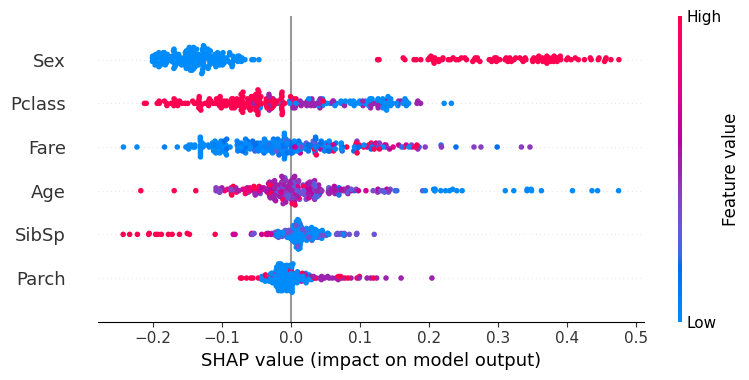

None


In [ ]:
if Model.value == 'Random forest':
  mod = RF(df, columns_of_interest, Dataset, target, train_dataset, test_dataset)
elif Model.value == 'Logistic regression':
  mod = Logit(df, Dataset, target, columns_for_analysis, train_dataset, test_dataset)
else:
  pass

RANGES SELECTION

In [ ]:
if Dataset.value in columns_for_analysis:
  columns = columns_for_analysis[Dataset.value]
else:
  columns = columns_of_interest[Dataset.value]

sliders = {}
for i,col in enumerate(columns):
  col_values = df[col]
  if df[col].dtype == 'object':
      # selection per colonne categoriche
      slider = widgets.Select(
          options=list(set(col_values)),
          value=col_values[0],
          description='%s:' % col
          )
  else:
      # intslider per colonne numeriche
      col_min = min(col_values)
      col_max = max(col_values)
      slider = widgets.IntRangeSlider(
          min=col_min,
          max=col_max,
          step=1,
          description='%s:' % col,
          value=[col_min  if lower is None else lower[i], col_max if upper is None else upper[i]]
      )
  display(slider)
  sliders[col] = slider

IntRangeSlider(value=(1, 3), description='Pclass:', max=3, min=1)

IntRangeSlider(value=(0, 1), description='Sex:', max=1)

IntRangeSlider(value=(0, 80), description='Age:', max=80)

IntRangeSlider(value=(0, 512), description='Fare:', max=512)

IntRangeSlider(value=(0, 8), description='SibSp:', max=8)

IntRangeSlider(value=(0, 6), description='Parch:', max=6)

RESET FILTERS

In [ ]:
lower,upper = None, None

SUB-SPACES ACCURACY (MANUAL)

Accuracy local: 0.8606965174129353
REPORT:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       139
           1       0.80      0.73      0.76        62

    accuracy                           0.86       201
   macro avg       0.84      0.82      0.83       201
weighted avg       0.86      0.86      0.86       201



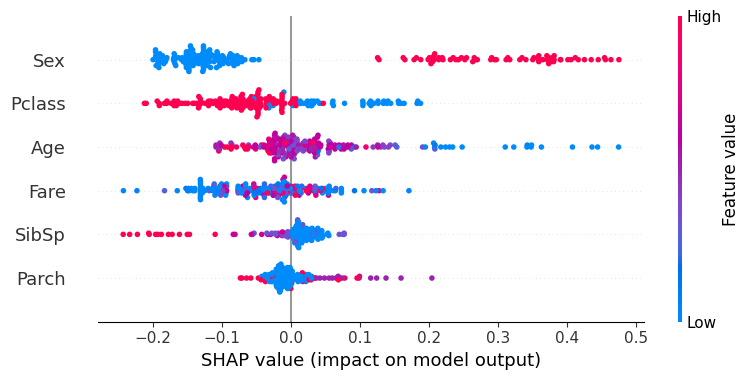

In [ ]:
local(Dataset, target, columns, sliders, mod, Model.value, train_dataset, test_dataset)

ACCURACY OPTIMIZATION

HIGH ACCURACY SUB-SPACE

[  2   1  64 512   8   6]
[1 0 0 0 0 0]
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2442013
Academic license 2442013 - for non-commercial use only - registered to fl___@uniroma1.it
Set parameter TimeLimit to value 600
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Academic license 2442013 - for non-commercial use only - registered to fl___@uniroma1.it
Optimize a model with 6949 rows, 3483 columns and 19889 nonzeros
Model fingerprint: 0x89a5a2ab
Variable types: 12 continuous, 3471 integer (3471 binary)
Coefficient statistics:
  Matrix range     [1e-01, 1e+03]
  Objective range  [3e-04, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e-04, 1e+03]
Found heuristic solution: objective 1.0000000
Presolve removed 1268 rows and 358 columns
Presolve time: 0.

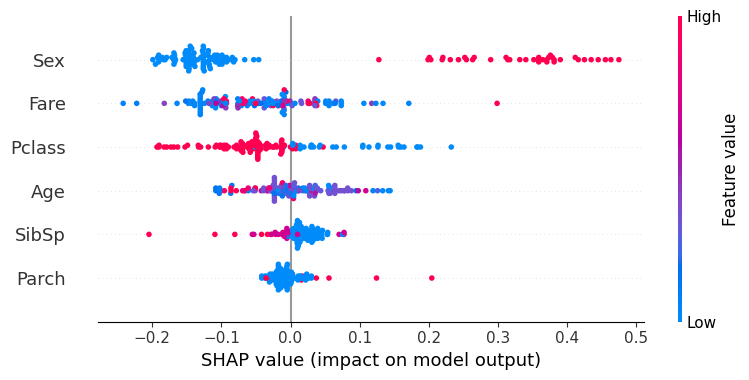

In [ ]:
lower, upper = optimizer_high(Dataset, 0.9, train_dataset, test_dataset, columns, target, sliders, mod, Model.value)

LOW ACCURACY SUB-SPACE

[80 22 18  1  1]
[15  0  0  0  0]
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2442013
Academic license 2442013 - for non-commercial use only - registered to fl___@uniroma1.it
Set parameter TimeLimit to value 600
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Academic license 2442013 - for non-commercial use only - registered to fl___@uniroma1.it
Optimize a model with 5946 rows, 2980 columns and 16704 nonzeros
Model fingerprint: 0x87d3fc06
Variable types: 10 continuous, 2970 integer (2970 binary)
Coefficient statistics:
  Matrix range     [5e-01, 2e+02]
  Objective range  [3e-03, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e-04, 2e+02]
Found heuristic solution: objective 0.8333333
Presolve removed 769 rows and 0 columns
Presolve time: 0.07s
Preso

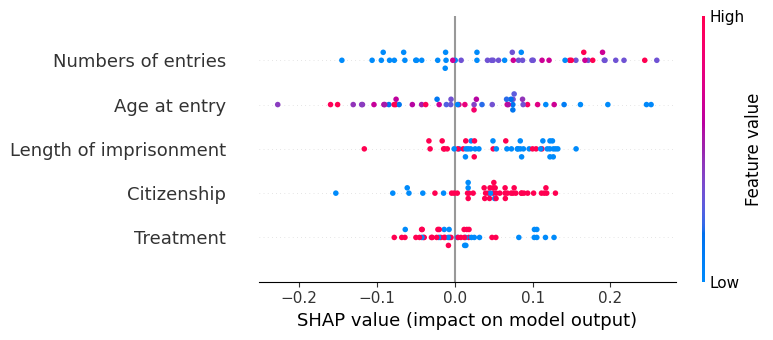

In [ ]:
lower, upper = optimizer_low(Dataset, 0.5, train_dataset, test_dataset, columns, target, sliders, mod, Model.value)